## Investigating Fandango Movie Ratings

Back in 2015, there was a famous article published on FiveThirtyEight where the author (Hickey) presented strong evidence which suggest that Fandango's movie rating system was biased and dishonest. More specificaly there were exaggerated. https://fivethirtyeight.com/features/fandango-movies-ratings/

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

We'll work with 2 samples of movie ratings:the data in one sample was collected previous to Hickey's analysis, while the other sample was collected after. Let's start by reading in the two samples (which are stored as CSV files) and getting familiar with their structure.

Before: https://github.com/fivethirtyeight/data/tree/master/fandango

After:
https://github.com/mircealex/Movie_ratings_2016_17

In [2]:
import pandas as pd
pd.options.display.max_columns = 100

previous = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

In [4]:
previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [6]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Now we'll isolate only the columns that provide information about Fandango. We'll make copies to avoid any SettingWithCopyWarning later on.

In [7]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [9]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [10]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [14]:
print(fandango_previous.shape)
print(fandango_after.shape)

(146, 5)
(214, 3)


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. 

Both samples we had were not random and by different people and are unlikely to be representative of the population we're interested in describing.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

## Isolating the Samples We Need

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term popular is too broad and wee need to define it more precisely. For the first sample it has been decided to be all movied with more than 30 ratings, so we can take it as a benchmark for both. In the second sample no numbers are specified for movies to be considered popular, so we'll just double check their ratings manually on Fandango and make sure they are also "popular" that is - have 30 ore more ratings on Fandango. 

We'll take a random sample.

In [15]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


After manually checking on Fandango we can see that 9 out of this 10 movies has indeed more than 30 ratings. So this should be enough for us to assume that both population meet the criteria of fame.

Let's also double check in any case the first population as well and make sure that the criteria indeed worked.

In [16]:
sum(fandango_previous["Fandango_votes"] < 30)

0

And we can see it did, now we can move forward with confidence.

If you explore the two data sets, we'll notice that there are movies with a releasing year different than 2015 or 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016.

Let's start with Hickey's data set and isolate only the movies released in 2015. There's no special column for the releasing year, but we should be able to extract it from the strings in the FILM column.

In [17]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [19]:
fandango_previous["Year"] = fandango_previous["FILM"].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [24]:
fandango_previous["Year"].value_counts()

#we can see that we have 129 movies with year 2015, we'll keep only those.

2015    129
2014     17
Name: Year, dtype: int64

In [38]:
fandango_2015 = fandango_previous[fandango_previous["Year"] == "2015"].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Now let's do the same with the second population. Here we already have a column Year, so we'll just filter those who are equaly to 2016.

In [27]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [29]:
fandango_after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [35]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

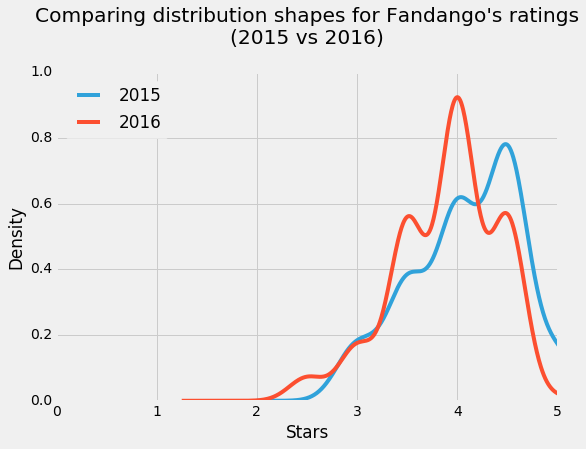

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') 

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.xlabel('Stars')
plt.xlim(0,5) #because ratings start at 0 and end at 5
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.show()


- Both distributions seem to have a normal shape. 
- Their shapes are relatively similar, both are left skewed. With 2016 being even more compared to 2015.

The left skew means that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, it might seem a bit suspicious. Even though it would be interesting to explore this but since this is quite irrelevant for the current goal of our analysis it won't make sense for now.

But the slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies

In [52]:
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [53]:
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can easily notice that the percentage of movies with high ratings such as 5 and 4.5 went down in 2016. Which resulted a percentage increase of movies with lower ratings such as 4 and 3.5 in 2016.

## Determining the Direction of the Change

In [54]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


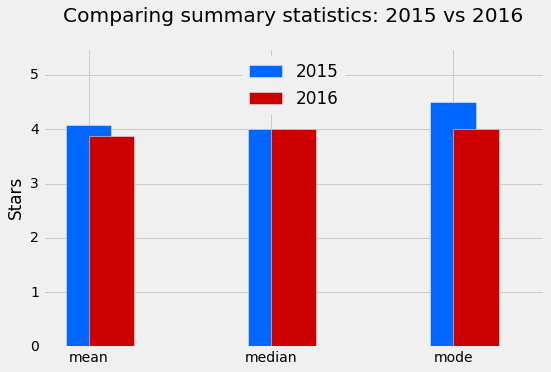

In [68]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5)
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.show()

Both mean and mode were lower in 2016 compared to 2015. So we can confirm the direction of the change we saw on the kernel density plot: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.